In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
folder_PhanTichPython = '/content/drive/MyDrive/PhanTichPython/'
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
df=pd.read_csv(folder_PhanTichPython+'incomedataset.csv')

Mounted at /content/drive
Mounted at /content/drive


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
def convert(status):
    if  status in ['Widowed','Never-married', 'Separated']:
        return 'Single'
    elif status in ['Married-spouse-absent','Married-civ-spouse',  'Married-AF-spouse']:
        return 'Married'
    else:
        return 'Divorced'

df['marital-status'] = df['marital-status'].apply(convert)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Single,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Single,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Single,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Single,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [ ]:
#Missing value
df.isnull().sum().sort_values(ascending=False).head(15)

,0
occupation,2506
workclass,2498
native-country,763
age,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
relationship,0
race,0


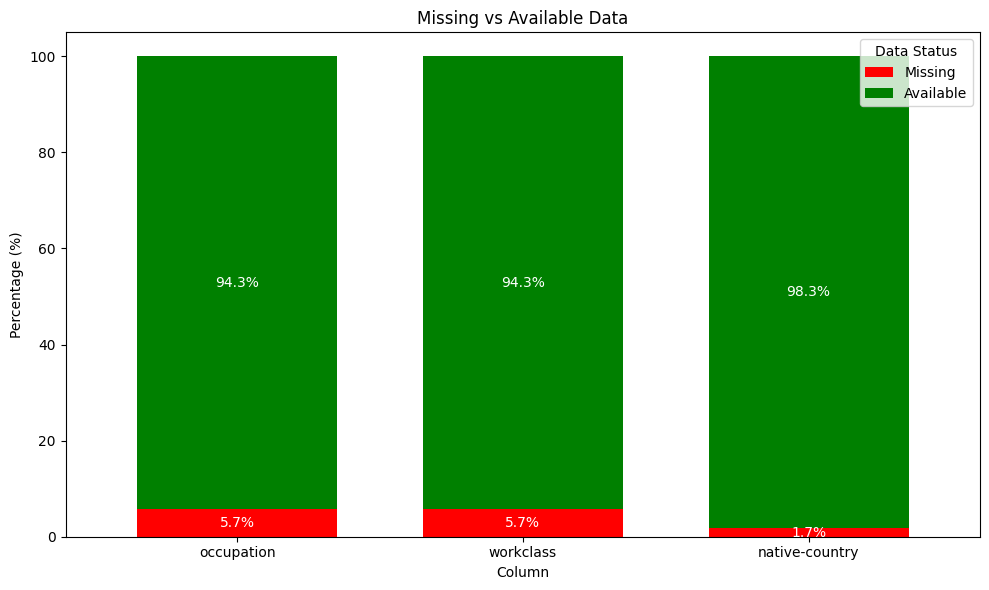

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các cột cần kiểm tra
columns = ['occupation', 'workclass', 'native-country']

# Tạo danh sách lưu trữ dữ liệu tỷ lệ
missing_data = []

# Tính toán tỷ lệ giá trị thiếu cho từng cột
for col in columns:
    missing_values = df[col].isnull().sum()
    total_values = len(df[col])
    missing_percent = (missing_values / total_values) * 100
    available_percent = 100 - missing_percent
    missing_data.append({'Column': col, 'Missing': missing_percent, 'Available': available_percent})

# Tạo DataFrame từ danh sách dữ liệu
df_missing = pd.DataFrame(missing_data)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_missing.set_index('Column')[['Missing', 'Available']].plot(
    kind='bar', stacked=True, ax=ax, color=['red', 'green'], width=0.7
)

# Thêm nhãn phần trăm lên biểu đồ
for idx, rect in enumerate(ax.patches):
    height = rect.get_height()  # Chiều cao của mỗi thanh
    if height > 0:  # Chỉ hiển thị nhãn nếu giá trị > 0
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # Vị trí x
            rect.get_y() + height / 2,           # Vị trí y (ở giữa thanh)
            f'{height:.1f}%',                   # Hiển thị giá trị với 1 chữ số thập phân
            ha='center', va='center', fontsize=10, color='white'
        )

# Tùy chỉnh biểu đồ
ax.set_ylabel('Percentage (%)')
ax.set_title('Missing vs Available Data')
ax.legend(title='Data Status')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()



In [ ]:
#Thay thế Missing Value
#Thay occupation bằng Mode
mode_occupation = df['occupation'].mode()[0]
# Thay giá trị rỗng của cột 'occupation' bằng giá trị mode
df['occupation'].fillna(mode_occupation, inplace=True)

#Thay workclass bằng Mode
mode_workclass = df['workclass'].mode()[0]
# Thay giá trị rỗng của cột 'workclass' bằng giá trị mode
df['workclass'].fillna(mode_workclass, inplace=True)

#Thay native-country bằng Mode
mode_nativecountry = df['native-country'].mode()[0]
# Thay giá trị rỗng của cột 'native-country' bằng giá trị mode
df['native-country'].fillna(mode_nativecountry, inplace=True)

<ipython-input-6-a86933b3993c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna(mode_occupation, inplace=True)
<ipython-input-6-a86933b3993c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

(array([7644., 7827., 8202., 8169., 5374., 3483., 2219.,  699.,  253.,
          87.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

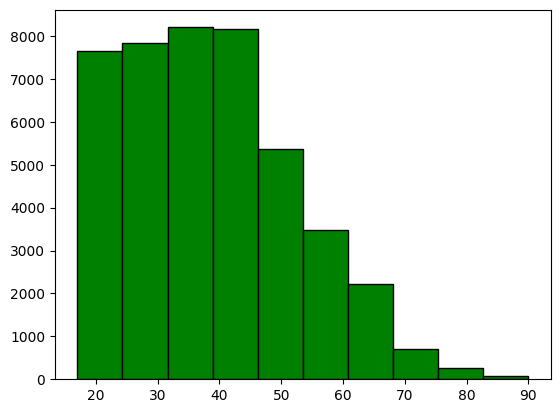

In [ ]:
#Outlier
#Xem phân phối cột age
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=10, color='green', edgecolor='black')

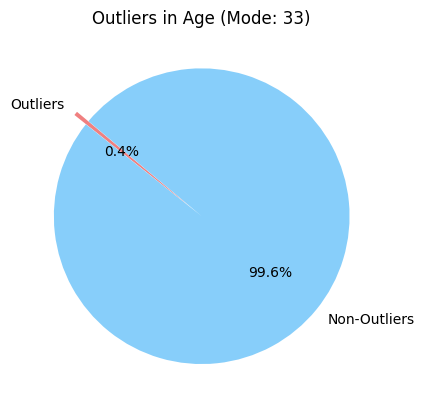

In [ ]:
#IQR
import numpy as np
import matplotlib.pyplot as plt

# Tính mode của cột 'age'
mode_value = df['age'].mode().values[0]

# Xác định các outliers bằng phương pháp IQR
Q1 = np.percentile(df['age'], 25)
Q3 = np.percentile(df['age'], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Lọc ra các chỉ số của các outliers
outlier_indices = df.index[(df['age'] < lower) | (df['age'] > upper)]
num_outliers = len(outlier_indices)
total_rows = len(df['age'])

# Tạo dữ liệu để vẽ biểu đồ tròn
labels = ['Outliers', 'Non-Outliers']
sizes = [num_outliers, total_rows - num_outliers]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Tạo hiệu ứng cho phần Outliers

# Vẽ biểu đồ tròn
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'Outliers in Age (Mode: {mode_value})')
plt.show()


In [ ]:
#Thay thế outlier bằng mode
df.loc[outlier_indices, 'age'] = mode_value

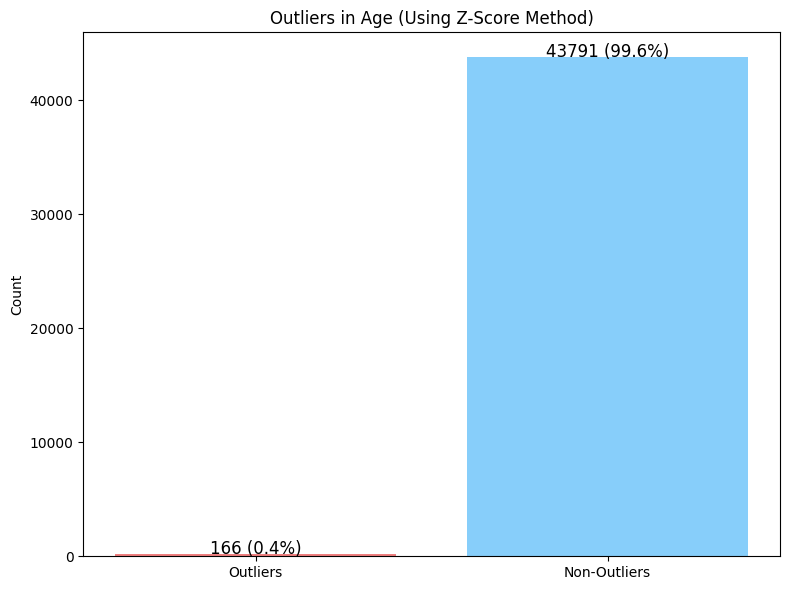

In [ ]:
#Z-Scores
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Tính z-score cho cột 'age'
z_scores = zscore(df['age'])

# Xác định các outliers (z-score > 3 hoặc < -3)
outliers_indices = df.index[np.abs(z_scores) > 3]
num_outliers = len(outliers_indices)
total_rows = len(df['age'])

# Tạo dữ liệu cho biểu đồ thanh
labels = ['Outliers', 'Non-Outliers']
sizes = [num_outliers, total_rows - num_outliers]
colors = ['lightcoral', 'lightskyblue']

# Vẽ biểu đồ thanh
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, sizes, color=colors)

# Thêm phần trăm lên biểu đồ thanh
for i, v in enumerate(sizes):
    ax.text(i, v + 0.5, f'{v} ({v/total_rows*100:.1f}%)', ha='center', fontsize=12)

# Thiết lập tiêu đề và nhãn trục
ax.set_title('Outliers in Age (Using Z-Score Method)')
ax.set_ylabel('Count')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [ ]:
#Thay thế outlier bằng mode
df.loc[outlier_indices, 'age'] = mode_value

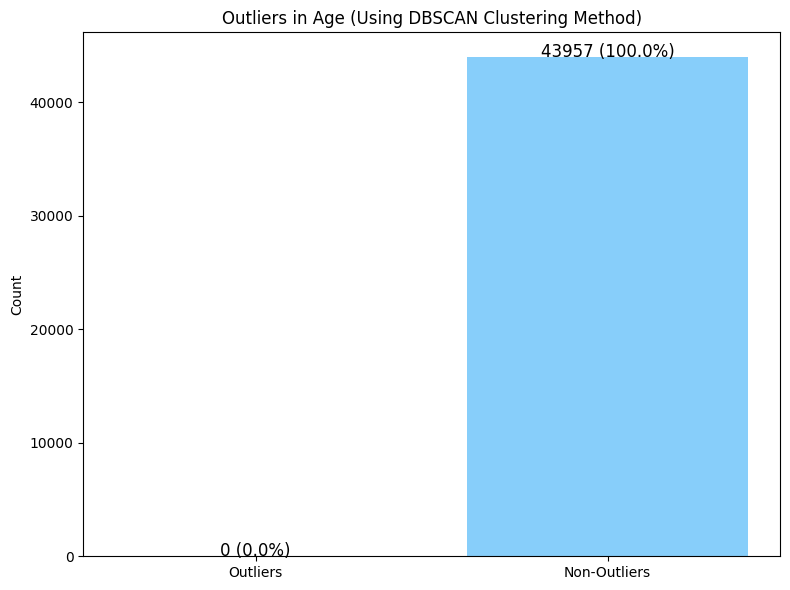

In [ ]:
#Phân cụm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Sử dụng DBSCAN để phân cụm dữ liệu 'age'
age_data = df[['age']].dropna()  # Loại bỏ các giá trị NaN nếu có

# Khởi tạo và chạy DBSCAN (eps là khoảng cách tối đa giữa hai điểm dữ liệu để được coi là trong cùng một cụm,
# min_samples là số lượng điểm tối thiểu trong một cụm)
db = DBSCAN(eps=3, min_samples=10)
df['cluster'] = db.fit_predict(age_data)

# Xác định outliers (các điểm có nhãn -1 trong DBSCAN là outliers)
outliers_indices = df.index[df['cluster'] == -1]
num_outliers = len(outliers_indices)
total_rows = len(df['age'])

# Tạo dữ liệu cho biểu đồ thanh
labels = ['Outliers', 'Non-Outliers']
sizes = [num_outliers, total_rows - num_outliers]
colors = ['lightcoral', 'lightskyblue']

# Vẽ biểu đồ thanh
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, sizes, color=colors)

# Thêm phần trăm lên biểu đồ thanh
for i, v in enumerate(sizes):
    ax.text(i, v + 0.5, f'{v} ({v/total_rows*100:.1f}%)', ha='center', fontsize=12)

# Thiết lập tiêu đề và nhãn trục
ax.set_title('Outliers in Age (Using DBSCAN Clustering Method)')
ax.set_ylabel('Count')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [1]:
#Hồi quy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sử dụng Linear Regression để ước tính giá trị 'age'
# Tạo một DataFrame chỉ có cột 'age' để làm dữ liệu đầu vào cho hồi quy
Education_data = df[['Education']].dropna()  # Loại bỏ giá trị NaN

# Mô hình hồi quy tuyến tính
X = np.arange(len(Education_data)).reshape(-1, 1)  # Chỉ số của mỗi dòng là biến độc lập
y = Education_data['Education'].values  # Giá trị của cột 'age' là biến phụ thuộc

# Tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị 'age' từ mô hình hồi quy
y_pred = model.predict(X)

# Tính toán phần dư (residuals) - chênh lệch giữa giá trị thực tế và giá trị dự đoán
residuals = y - y_pred

# Xác định outliers: Các điểm có phần dư > 2*độ lệch chuẩn được coi là outliers
std_residuals = np.std(residuals)
outliers_indices = Education_data.index[np.abs(residuals) > 2 * std_residuals]
num_outliers = len(outliers_indices)
total_rows = len(Education_data)

# Tạo dữ liệu cho biểu đồ thanh
labels = ['Outliers', 'Non-Outliers']
sizes = [num_outliers, total_rows - num_outliers]
colors = ['lightcoral', 'lightskyblue']

# Vẽ biểu đồ thanh
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, sizes, color=colors)

# Thêm phần trăm lên biểu đồ thanh
for i, v in enumerate(sizes):
    ax.text(i, v + 0.5, f'{v} ({v/total_rows*100:.1f}%)', ha='center', fontsize=12)

# Thiết lập tiêu đề và nhãn trục
ax.set_title('Outliers in Age (Using Linear Regression Residuals)')
ax.set_ylabel('Count')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


NameError: name 'df' is not defined